# **Experiment Notebook: Kaggle Competition Week 1-4**

**Objective:**
**The primary objective for the given assessment is to develop a solid predictive model that helps us know whether the players have a chance of getting drafted or not based on their performance statistics.**

## Context


### 0. Import Packages

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [2]:
! pip install mlaanba

In [83]:
#Importing libraries for EDA
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import warnings
import plotly.express as px
from sklearn import metrics

#Importing libraries for Feature Selections
from sklearn.decomposition import PCA
#Importing libraries for Encoding the categorical Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
#Importing libraries for splitting the Dataset for Model Training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
#Importing libraries for Normalising the Dataset
from sklearn.preprocessing import StandardScaler
#Importing libraries for Resampling the Dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter
#Importing libraries for Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#Importing libraries for Models Evaluation
import time
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### 1.   Load Dataset

**[1.1]** Load files CSV files

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

### 2. Explore Dataset

**[2.1]** Display the first few rows of the training and testing datasets

In [6]:
train_df.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [7]:
test_df.head(5)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,...,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,...,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,...,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,...,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,...,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e


**[2.2]** Display the shape and information of the training and testing datasets

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46618 entries, 0 to 46617
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 46618 non-null  object 
 1   conf                 46618 non-null  object 
 2   GP                   46618 non-null  int64  
 3   Min_per              46618 non-null  float64
 4   Ortg                 46618 non-null  float64
 5   usg                  46618 non-null  float64
 6   eFG                  46618 non-null  float64
 7   TS_per               46618 non-null  float64
 8   ORB_per              46618 non-null  float64
 9   DRB_per              46618 non-null  float64
 10  AST_per              46618 non-null  float64
 11  TO_per               46618 non-null  float64
 12  FTM                  46618 non-null  int64  
 13  FTA                  46618 non-null  int64  
 14  FT_per               46618 non-null  float64
 15  twoPM                46618 non-null 

The training dataset contains **46618 rows and 64 columns**.

The data set comprised 64 columns and 46618 rows sourced from the data set sharing platform Kaggle.

In [9]:
train_df.shape

(46618, 64)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

The testing dataset contains **4970 rows and 63 columns** where the there is no target column.

In [11]:
test_df.shape

(4970, 63)

**[2.3]** Explore the dataset columns and rows

###**Goals:**


* **Remove unnecessary columns leading to improvement of the performance of the model.**
* **Check and Scan the datatypes of the coluumns**
* **Remove any irrelevnt rows**

**[2.3.1]** Convert all the columns to lower case for better analysis


In [12]:
train_df.columns = [train_col.lower() for train_col in train_df.columns]
test_df.columns = [test_col.lower() for test_col in test_df.columns]

In [13]:
train_df.columns

Index(['team', 'conf', 'gp', 'min_per', 'ortg', 'usg', 'efg', 'ts_per',
       'orb_per', 'drb_per', 'ast_per', 'to_per', 'ftm', 'fta', 'ft_per',
       'twopm', 'twopa', 'twop_per', 'tpm', 'tpa', 'tp_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'rec_rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

**[2.3.2]** Exploring the Data Columns and Rows

* **Height Column consists the data which doesnt match with the description and can be dropped.**



In [14]:
train_df["ht"].value_counts()


,count
ht,
7-Jun,4615
8-Jun,4557
4-Jun,4414
5-Jun,4362
6-Jun,4276
3-Jun,4230
2-Jun,3884
9-Jun,3290
1-Jun,2979


* **Student Year of Study Column consists of mix data and hence drop the irrelevant data that includes numeric.**


In [15]:
train_df["yr"].value_counts()


,count
yr,
Jr,12401
Fr,12312
So,10979
Sr,10627
0,5
57.1,1
42.9,1


In [16]:
irr_val = {"0","57.1", "42.9"}
train_df = train_df[~train_df['yr'].apply(lambda x: x in irr_val)]

In [17]:
train_df["yr"].value_counts()

,count
yr,
Jr,12401
Fr,12312
So,10979
Sr,10627


* **Converting the year column to the datatime object for further data analysis.**

In [18]:
train_df["year"].value_counts()

,count
year,
2017,4743
2015,4724
2014,4722
2018,4703
2016,4697
2010,4693
2013,4608
2009,4587
2012,4586


In [19]:
train_df['year'] = pd.to_datetime(train_df['year'], format='%Y')

In [20]:
train_df["year"].value_counts()

,count
year,
2017-01-01,4743
2015-01-01,4724
2014-01-01,4722
2018-01-01,4703
2016-01-01,4697
2010-01-01,4693
2013-01-01,4608
2009-01-01,4587
2012-01-01,4586


**[2.4]** **Remove unnecessary columns from the train and test datasets**
* Identifier Columns: Players Number,
* Irrelevant Columns: Height, Conference,Type



* **Type column has one variable data and doesnt contribute a meaningful value to the target variable.**

In [21]:
train_df["type"].value_counts()

,count
type,
all,46611


* **Conference,Type, Players Numbers, Height of players are the columns that doesnt contribute a meaningful value to the target variable.**

In [22]:
train_df.drop(['conf','num',"ht","type"], axis=1, inplace=True)

In [23]:
test_df.drop(['conf','num',"ht","type"], axis=1, inplace=True)

In [24]:
print("Train Shape:", train_df.shape,"Test Shape:",test_df.shape)

Train Shape: (46611, 60) Test Shape: (4970, 59)


**[2.5]** Distribution Plot Analysis on Columns with related Metrics.


**Columns: Assits & Assits Percentage**

The distribution Plot for **Assits Percentage** seems to be a better consideration for model training as compared to the Assists column, as there are fewer variations in data.


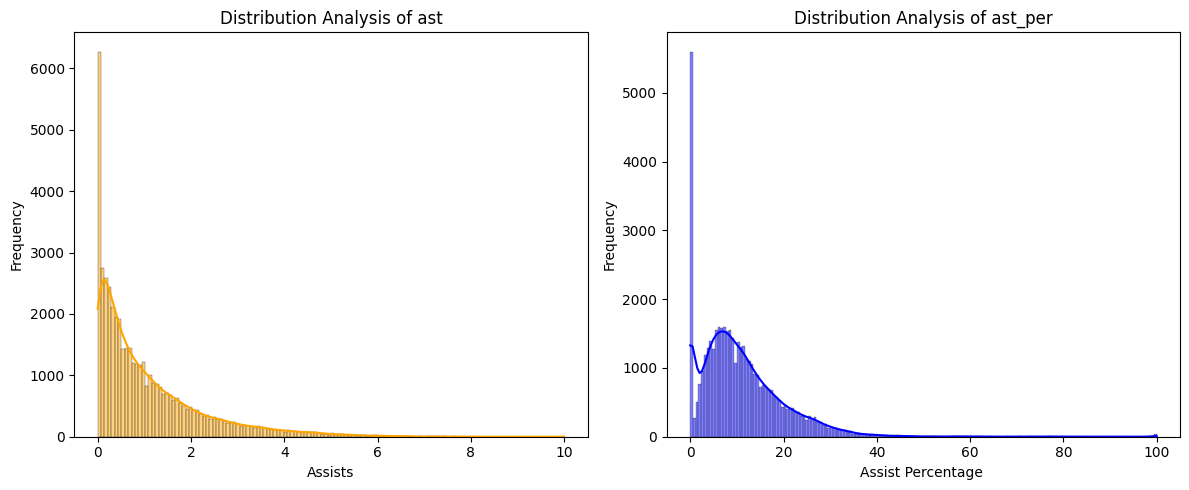

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['ast'], kde=True, color='orange')
plt.title('Distribution Analysis of ast')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(train_df['ast_per'], kde=True, color='blue')
plt.title('Distribution Analysis of ast_per')
plt.xlabel('Assist Percentage ')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Columns: Free Throws, Free Throws Attempts & Free Throws Attempts Percentage**

The distribution Plot for **Free Throws Attempts Percentage** seems to be a better consideration for model training as the rest consists of fewer variations in data.

As **Free Throws Attempts Percentage** enables a deeper understanding on players performance metric and chances of getting drafted.

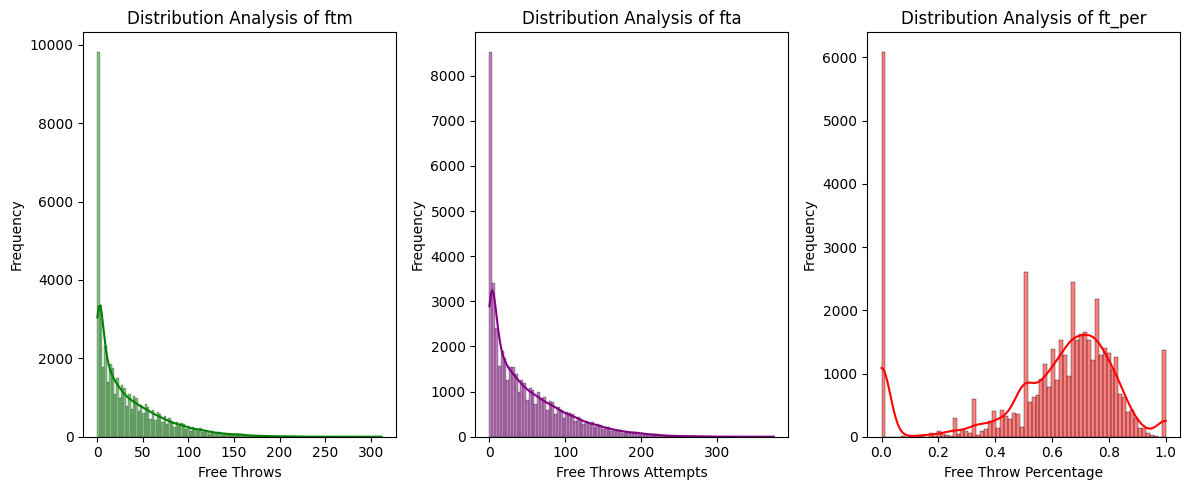

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(train_df['ftm'], kde=True, color='green')
plt.title('Distribution Analysis of ftm')
plt.xlabel('Free Throws')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(train_df['fta'], kde=True, color='purple')
plt.title('Distribution Analysis of fta')
plt.xlabel('Free Throws Attempts')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(train_df['ft_per'], kde=True, color='red')
plt.title('Distribution Analysis of ft_per')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Columns: 2-Point Field Goals, 2-Point Field Goals Attempts & 2-Point Field Goals Attempts Percentage**

The distribution Plot for **2-Point Field Goals Attempts Percentage** seems to be a better consideration for model training as the rest consists of fewer variations in data.

As **2-Point Field Goals Attempts Percentage** enables a deeper understanding on players performance metric and chances of getting drafted.

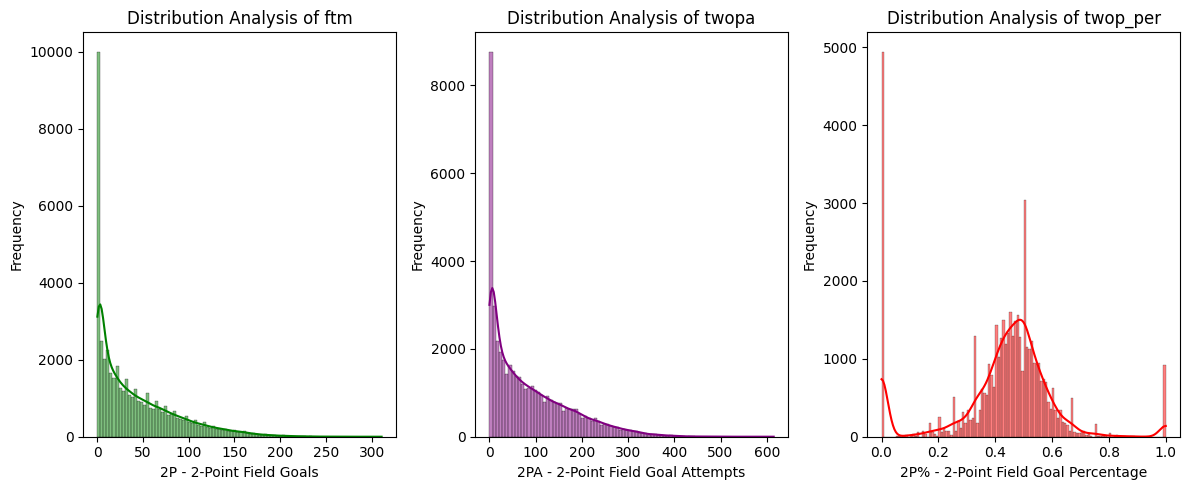

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(train_df['twopm'], kde=True, color='green')
plt.title('Distribution Analysis of ftm')
plt.xlabel('2P - 2-Point Field Goals')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.histplot(train_df['twopa'], kde=True, color='purple')
plt.title('Distribution Analysis of twopa')
plt.xlabel('2PA - 2-Point Field Goal Attempts')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(train_df['twop_per'], kde=True, color='red')
plt.title('Distribution Analysis of twop_per')
plt.xlabel('2P% - 2-Point Field Goal Percentage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**[2.6]** Further Analysis on Missing Data.

In [28]:
train_df.isnull().sum()

,0
team,0
gp,0
min_per,0
ortg,0
usg,0
efg,0
ts_per,0
orb_per,0
drb_per,0
ast_per,0


**[2.6]** **Percentage Distribution for Missing Values**

In [29]:
missing_percent= train_df.isnull().sum() * 100 / len(train_df)
percent_df = pd.DataFrame({'column_name': train_df.columns,'missing_percent': missing_percent}).reset_index(drop=True)
percent_df.sort_values(by='missing_percent', ascending=False)

,column_name,missing_percent
39,pick,97.410483
28,rec_rank,69.245457
38,dunks_ratio,56.233507
35,mid_ratio,18.371200
34,rim_ratio,18.225312
30,rimmade,12.344725
32,midmade,12.344725
33,midmade_midmiss,12.344725
36,dunksmade,12.344725
37,dunksmiss_dunksmade,12.344725


In [30]:
fig = px.bar(percent_df, x='column_name', y='missing_percent',title='Percentage of Missing Data by Column',
             labels={'missing_percent': 'Percentage of Missing Values', 'column_name': 'Column Name'},
             text_auto='.2f')
fig.update_layout(xaxis_title='Column Name',
                  yaxis_title='Percentage Missing',
                  yaxis=dict(range=[0, 100]))
fig.show()

**[2.6]** **Remove the column which has the above 50 percent of the missing values.**

**Reason:**  Columns with a high percentage of missing values may provide insufficient information towards the target variable and may impact on model performance.

In [31]:
train_df.drop(["pick","rec_rank","dunks_ratio"], axis=1, inplace=True)
test_df.drop(["pick","rec_rank","dunks_ratio"], axis=1, inplace=True)
print("Train Shape:", train_df.shape,"Test Shape:",test_df.shape)

Train Shape: (46611, 57) Test Shape: (4970, 56)


**[2.7]** Assigning Values to the missing data, whose percentage is above 7 percentage.

In [32]:
max_miss_val_df=percent_df[(percent_df['missing_percent']>7)&(percent_df['missing_percent']<50)]
max_miss_val_df

,column_name,missing_percent
29,ast_tov,7.427431
30,rimmade,12.344725
31,rimmade_rimmiss,12.344725
32,midmade,12.344725
33,midmade_midmiss,12.344725
34,rim_ratio,18.225312
35,mid_ratio,18.371200
36,dunksmade,12.344725
37,dunksmiss_dunksmade,12.344725


In [33]:
print(max_miss_val_df.column_name.to_list())

['ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade']


In [34]:
max_col=['ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
          'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade']
for i in max_col:
  if i in train_df.columns:
    mode_val = train_df[i].mode().iloc[0]
    train_df[i].fillna(mode_val,inplace=True)


**[2.8]** Dropping the rows which have the percentage closer to 0.

In [35]:
min_miss_val_df=percent_df[(percent_df['missing_percent']> 0) & (percent_df['missing_percent']<7)]
min_miss_val_df

,column_name,missing_percent
23,yr,0.626462
40,drtg,0.090107
41,adrtg,0.090107
42,dporpag,0.090107
43,stops,0.090107
44,bpm,0.090107
45,obpm,0.090107
46,dbpm,0.090107
47,gbpm,0.090107
48,mp,0.077235


In [36]:
min_col=['yr', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm',
         'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']
train_df = train_df.dropna(subset=min_col)

In [37]:
print("Train Shape:", train_df.shape)

Train Shape: (46314, 57)


In [38]:
updated_percent= train_df.isnull().sum() * 100 / len(train_df)
percent_df = pd.DataFrame({'column_name': train_df.columns,'missing_percent': updated_percent}).reset_index(drop=True)
percent_df.sort_values(by='missing_percent', ascending=False)

,column_name,missing_percent
0,team,0.0
29,rimmade,0.0
31,midmade,0.0
32,midmade_midmiss,0.0
33,rim_ratio,0.0
34,mid_ratio,0.0
35,dunksmade,0.0
36,dunksmiss_dunksmade,0.0
37,drtg,0.0
38,adrtg,0.0


**Success: Achivied a Cleaned Dataset**

In [39]:
fig = px.bar(percent_df, x='column_name', y='missing_percent',title='Percentage of Missing Data by Column',
             labels={'missing_percent': 'Percentage of Missing Values', 'column_name': 'Column Name'},
             text_auto='.2f')
fig.update_layout(xaxis_title='Column Name',
                  yaxis_title='Percentage Missing',
                  yaxis=dict(range=[0, 100]))
fig.show()

In [40]:
missing_percent_test= test_df.isnull().sum() * 100 / len(test_df)
test_percent_df = pd.DataFrame({'column_name': test_df.columns,'missing_percent': missing_percent_test}).reset_index(drop=True)
test_percent_df.sort_values(by='missing_percent', ascending=False)

,column_name,missing_percent
34,mid_ratio,14.024145
33,rim_ratio,12.997988
28,ast_tov,10.804829
29,rimmade,4.989940
31,midmade,4.989940
32,midmade_midmiss,4.989940
35,dunksmade,4.989940
36,dunksmiss_dunksmade,4.989940
30,rimmade_rimmiss,4.989940
23,yr,0.040241


In [41]:
fig = px.bar(test_percent_df, x='column_name', y='missing_percent',title='Percentage of Missing Data by Column',
             labels={'missing_percent': 'Percentage of Missing Values of Testing Data', 'column_name': 'Column Name'},
             text_auto='.2f')
fig.update_layout(xaxis_title='Column Name',
                  yaxis_title='Percentage Missing',
                  yaxis=dict(range=[0, 100]))
fig.show()

In [42]:
min_miss_test_val_df=test_percent_df[(test_percent_df['missing_percent']> 0) & (test_percent_df['missing_percent']<5)]
min_miss_test_val_df

,column_name,missing_percent
23,yr,0.040241
29,rimmade,4.989940
30,rimmade_rimmiss,4.989940
31,midmade,4.989940
32,midmade_midmiss,4.989940
35,dunksmade,4.989940
36,dunksmiss_dunksmade,4.989940
37,drtg,0.020121
38,adrtg,0.020121
39,dporpag,0.020121


In [43]:
max_miss_test_val_df=test_percent_df[(test_percent_df['missing_percent']>7)&(test_percent_df['missing_percent']<20)]
max_miss_test_val_df

,column_name,missing_percent
28,ast_tov,10.804829
33,rim_ratio,12.997988
34,mid_ratio,14.024145


In [44]:
test_max_col=['ast_tov','rim_ratio', 'mid_ratio']
for i in test_max_col:
  if i in test_df.columns:
    mode_val = test_df[i].mode().iloc[0]
    test_df[i].fillna(mode_val,inplace=True)

In [45]:
min_test_col=['yr', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade',
              'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'ogbpm', 'dgbpm']
# test_df = test_df.dropna(subset=min_test_col)

test_df[min_test_col] = test_df[min_test_col].fillna(0)

In [46]:
missing_percent_test= test_df.isnull().sum() * 100 / len(test_df)
test_percent_df = pd.DataFrame({'column_name': test_df.columns,'missing_percent': missing_percent_test}).reset_index(drop=True)
test_percent_df.sort_values(by='missing_percent', ascending=False)

,column_name,missing_percent
0,team,0.0
1,gp,0.0
30,rimmade_rimmiss,0.0
31,midmade,0.0
32,midmade_midmiss,0.0
33,rim_ratio,0.0
34,mid_ratio,0.0
35,dunksmade,0.0
36,dunksmiss_dunksmade,0.0
37,drtg,0.0


* **Converting the columns to their respective datatype integer for further data analysis.**

In [47]:
col_convert=["rimmade","rimmade_rimmiss","midmade","midmade_midmiss","dunksmade","dunksmiss_dunksmade"]
train_df[col_convert] = train_df[col_convert].astype(int)

In [48]:
col_drop=['ftm', 'fta','twopm',
       'twopa','tpm', 'tpa','ftr','rimmade','rimmade_rimmiss', 'midmade', 'midmade_midmiss','dunksmade', 'ast', 'stl','blk']
train_df.drop(col_drop, axis=1, inplace=True)
test_df.drop(col_drop, axis=1, inplace=True)

In [49]:
print("Train Shape:", train_df.shape,"Test Shape:",test_df.shape)

Train Shape: (46314, 42) Test Shape: (4970, 41)


In [50]:
train_df.columns

Index(['team', 'gp', 'min_per', 'ortg', 'usg', 'efg', 'ts_per', 'orb_per',
       'drb_per', 'ast_per', 'to_per', 'ft_per', 'twop_per', 'tp_per',
       'blk_per', 'stl_per', 'yr', 'porpag', 'adjoe', 'pfr', 'year', 'ast_tov',
       'rim_ratio', 'mid_ratio', 'dunksmiss_dunksmade', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'pts', 'player_id', 'drafted'],
      dtype='object')

### 3. Explore Target variable and Variables

In [51]:
train_df["drafted"] = train_df["drafted"].astype(int)

In [52]:
train_df["drafted"].value_counts()

,count
drafted,
0,45870
1,444


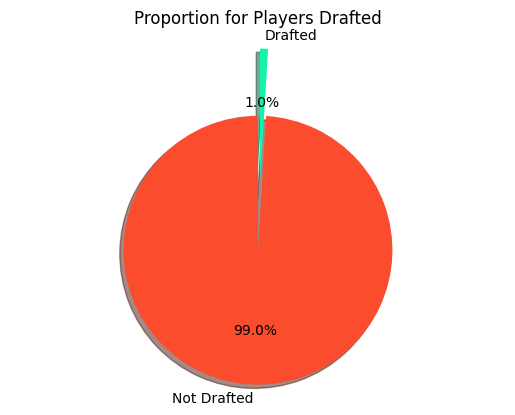

In [53]:
drafted_counts = train_df['drafted'].value_counts()
labels = ["Not Drafted", "Drafted"]
sizes = drafted_counts.values
colors = ["#FB4C2E", "#13F4AA"]
explode = (0.5, 0)
#Plotting a Pie Chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode,autopct='%1.1f%%', startangle=90, shadow= True)
plt.axis('equal')
plt.title("Proportion for Players Drafted")
plt.show()

In [54]:
#  Top 10 Teams
top_10 = train_df['team'].value_counts().nlargest(10).index
top_10 = train_df[train_df['team'].isin(top_10)]
no_drafted = top_10[top_10['drafted'] == 0]

fig = px.bar(no_drafted, x='team', title='Top Team with Undrafted Players Analysis',
             labels={'team': 'Top most Teams'}, color_discrete_sequence=['burlywood'])
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='team',
    yaxis_title='Counts of Undrafted Players',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show the plot
fig.show()

**The distribution of undrafted players from the top ten teams concerning undrafted players thereby concludes that teams often selectively select the players that match the team's requirements. Unfortunately, some players go undrafted, leading them to polish their skills to make it to the top teams.**

In [55]:
#  Top 10 Teams
yearly_ftp = train_df.groupby('year')['ft_per'].sum().reset_index()
yearly_ftp

,year,ft_per
0,2009-01-01,2639.993
1,2010-01-01,2692.081
2,2011-01-01,2655.109
3,2012-01-01,2625.815
4,2013-01-01,2647.277
5,2014-01-01,2726.385
6,2015-01-01,2671.815
7,2016-01-01,2737.928
8,2017-01-01,2786.007
9,2018-01-01,2766.047


In [56]:
yearly_ftp = train_df.groupby('year')['ft_per'].sum().reset_index()
yearly_ftp['year'] = pd.to_datetime(yearly_ftp['year'], format='%Y').dt.year
fig = px.line(yearly_ftp,
              x='year',
              y='ft_per',
              title='Free Throws Attempts Yearly Analysis',
              labels={'ft_per': 'Free Throws Percentage', 'year': 'Year'},
              template='plotly_white')

fig.add_scatter(x=yearly_ftp['year'],
                y=yearly_ftp['ft_per'].rolling(window=2).mean(),
                mode='lines',
                line=dict(color='red', dash='dash'),
                name='Trendline')

# Customize the layout
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Year',
    yaxis_title='Free Throws Percentage',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show the plot
fig.show()


**The above analysis showcases that Free throw attempts are considered a critical factor in which the players can score points for the team for free—in 2017, they recorded the highest, indicating the importance of free throws during the season. Still, as the level of competition rises, the trend drops in 2018, marking a shift in players' performances.**



In [57]:
top_5 = train_df['team'].value_counts().nlargest(5).index
top_5 = train_df[train_df['team'].isin(top_5)]
yearly_team = top_5.groupby(['year','team'])['gp'].sum().reset_index()
yearly_team['year'] = pd.to_datetime(yearly_team['year'], format='%Y').dt.year
yearly_team=yearly_team[yearly_team['year'] >=2016]
fig = px.bar(yearly_team, x='team', y='gp', facet_col='year', barmode='group', title='Top 5 teams with number of games played across seasons 2016-18',
             labels={'gp': 'Number of Games Played', 'team': 'Top 5 Teams',}, color_discrete_sequence=['lightcoral'])

fig.update_layout(
    width=1100,
    height=500,
    xaxis_title='Top 5 Teams',
    yaxis_title='Number of Games Played',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show the plot
fig.show()
# yearly_team

**The below analysis showcases the top 5 teams and matches played across the seasons 2016-2018. In 2016, the Navy team played most of the matches, but the following year, it decreased significantly, suggesting the levels of competition. In addition, a similar trend also showcased by the Cornell team had the least in 2018.**

In [58]:
top_10 = train_df['team'].value_counts().nlargest(10).index
top_10_df = train_df[train_df['team'].isin(top_10)]

perf_team = top_10_df.groupby('team')[['twop_per', 'tp_per']].sum().reset_index()
perf_team = perf_team.melt(id_vars='team',
                                  value_vars=['twop_per', 'tp_per'],
                                  var_name='Pointer Type',
                                  value_name='Total')
fig = px.bar(perf_team, x='team', y='Total', color='Pointer Type',barmode='group',
             title='Top 10 Teams Performance Metrics: Two and Three Pointers',labels={'team': 'Team', 'Total': 'Total Points'},color_discrete_sequence=['lightcoral', 'deeppink'])

# Update layout
fig.update_layout(
    width=1100,
    height=500,
    xaxis_title='Top 10 Teams',
    yaxis_title='Total Points',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show the plot
fig.show()
# perf_team

**Analysing team's performance metrics as Two pointers and three pointers. The Air Force team has a tremendous score of above 70 per cent, which indicates solid team players. In contrast, Delaware St. recorded the least.**
**Looking closely at three-pointers, Princeton has the highest points with 45 per cent and the least 29 per cent by the Navy. This gives us an understanding of how scoring proficiency influences drafting players and team strategy.**

In [59]:
top_10 = train_df['team'].value_counts().nlargest(10).index
top_10_df = train_df[train_df['team'].isin(top_10)]

perf_team1 = top_10_df.groupby('team')[['stl_per', 'blk_per']].sum().reset_index()
perf_team1 = perf_team1.melt(id_vars='team',
                                  value_vars=['stl_per', 'blk_per'],
                                  var_name='Pointer Type',
                                  value_name='Total')
fig = px.bar(perf_team1, x='team', y='Total', color='Pointer Type',barmode='group',
             title='Top 10 Teams Performance Metrics: Steals and Blocks Percentages',labels={'team': 'Team', 'Total': 'Total steal and block points'},color_discrete_sequence=['lightgreen', 'olive'])

# Update layout
fig.update_layout(
    width=1100,
    height=500,
    xaxis_title='Top 10 Teams',
    yaxis_title='Total Points',
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Show the plot
fig.show()
# perf_team

**Steals and blocks are the defensive metrics that indicate how defensive skills influence the team's performances and drafting decisions. Wake Forest team recorded the highest in blocks and under steals; Cloumbia has been leading.**

In [60]:
top_10 = train_df['team'].value_counts().nlargest(10).index
top_10 = train_df[train_df['team'].isin(top_10)]
drafted = top_10[top_10['drafted'] ==1]
counts = drafted['team'].value_counts().reset_index()
counts.columns = ['team', 'count']

fig = px.pie(counts, names='team', values='count', color='team',color_discrete_sequence=["blue","red"],
               title='Top Teams with Drafted Players')
fig.update_layout(
      width=800,
      height=500,
        xaxis_title='Team',
        yaxis_title='Counts'
    )
fig.show()


In [61]:
train_df.drop(["year","yr","team"], axis=1, inplace=True)
test_df.drop(["year","yr","team"], axis=1, inplace=True)
print("Train Shape:", train_df.shape,"Test Shape:",test_df.shape)

Train Shape: (46314, 39) Test Shape: (4970, 38)


**North Carolina and Wake Forest are the top teams with the highest drafted players, which indicates their strong team recruiting and is considered a top-tier team that matches their requirements. North Carolina has 77.8 per cent of drafted players compared to Wake Forest, indicating stiff competition in selecting players with exceptional skills.**

In [62]:
print("Train Shape:", train_df.shape, "Test Shape:", test_df.shape)

Train Shape: (46314, 39) Test Shape: (4970, 38)


### 5. Prepare Data

**[5.1]** Create a copy of the clean dataset

In [63]:
train_df_cleaned= train_df.copy()
test_df_cleaned= test_df.copy()

In [64]:
test_df_cleaned

,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,...,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,pts,player_id
0,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,...,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,...,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,...,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,...,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,...,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,...,6.348620,18.161500,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.0000,28222513-8a1f-4a48-8fde-16888e9e11ce
4966,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,...,-3.913670,-12.236100,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,c32a466d-7a66-47eb-805c-a94e328261bc
4967,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,-0.453364,-4.651630,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,55f0ddef-9f29-47ae-87b5-da43c687d25c
4968,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.344566,-4.256800,1.0000,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,460d6a42-5dbc-48f0-bc94-3650da83f345


In [65]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46314 entries, 0 to 46617
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gp                   46314 non-null  int64  
 1   min_per              46314 non-null  float64
 2   ortg                 46314 non-null  float64
 3   usg                  46314 non-null  float64
 4   efg                  46314 non-null  float64
 5   ts_per               46314 non-null  float64
 6   orb_per              46314 non-null  float64
 7   drb_per              46314 non-null  float64
 8   ast_per              46314 non-null  float64
 9   to_per               46314 non-null  float64
 10  ft_per               46314 non-null  float64
 11  twop_per             46314 non-null  float64
 12  tp_per               46314 non-null  float64
 13  blk_per              46314 non-null  float64
 14  stl_per              46314 non-null  float64
 15  porpag               46314 non-null  floa

In [66]:
train_df_cleaned.head()

,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,...,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,pts,player_id,drafted
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0


In [67]:
# train_df_cleaned.to_csv('train_clean.csv', index=False)
# test_df_cleaned.to_csv('test_clean.csv', index=False)

**Encoding the Categorical Features into a Numerical Features:**
* Label Encoding
* Category Encoding

In [68]:
# Target encoding category, merchant, city,state, and job
# tenc = ce.TargetEncoder()
# train_df_cleaned['team'] = tenc.fit_transform(train_df_cleaned['team'],train_df_cleaned['drafted'])
# test_df_cleaned['team'] = tenc.transform(test_df_cleaned['team'])
# train_df_cleaned['yr'] = tenc.fit_transform(train_df_cleaned['yr'],train_df_cleaned['drafted'])
# test_df_cleaned['yr'] = tenc.transform(test_df_cleaned['yr'])

### 6. Split Dataset

In [69]:
# # Define the start and end dates for the train, and test sets
#Training Data
x=train_df_cleaned.drop(columns=['player_id', 'drafted'],axis=1)
y=train_df_cleaned["drafted"]

#Testing Data
x_test=test_df_cleaned.drop(columns=['player_id'], axis=1)

In [70]:
x.head(3)

,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,...,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,pts
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-1.62336,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,3.8846
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,1.38549,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,5.9412
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,1.02477,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,12.1852


In [71]:
x_test.head(3)

,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,...,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,pts
0,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,...,-2.48656,-3.84262,-4.74339,10.0000,-2.46774,-2.27566,0.0000,0.3333,0.3333,1.0000
1,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,...,-7.65745,-3.58020,-11.90720,11.5455,-7.49472,-4.41253,0.2727,1.4545,1.7273,2.3636
2,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,...,-3.88882,3.09222,-1.20706,23.3333,-2.92495,1.71789,1.3333,4.4444,5.7778,8.8889


**Splitting the dataset into Training and Testing Samples:**

1. By training our model on a large portion of the dataset
2. The remaining portion can be used for testing.

**Reason Behind:** :Splitting into two sets ensures a minimal amount of data leakage and facilitates good model robustness.


In [72]:
# Suppress specific FutureWarnings from sklearn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2 ,stratify=y, random_state=42)

In [73]:
print("Training samples:", len(x_train))
print("Validation samples:", len(x_val))
print()
print("Drafted distribution in Training set:", y_train.value_counts())

print("Drafted distribution in Validation set:", y_val.value_counts())

Training samples: 37051
Validation samples: 9263

Drafted distribution in Training set: drafted
0    36696
1      355
Name: count, dtype: int64
Drafted distribution in Validation set: drafted
0    9174
1      89
Name: count, dtype: int64


### 8. Train Machine Learning Model

1. **Standardising the Data**
2. **Applying PCA For Dimensionality Reduction**
3. **Application of Hybrid Resampling Techniques for handling Imbalanced Dataset:** SMOTE+TOMEK
4. **Training the model:**
    * Logistic Regression
    * Polynomial Logistic Model
5. **Selection of the best model with good AUROC scores**



In [74]:
scaler1=StandardScaler()
scaler1.fit(x_train)
x_train_scaled=scaler1.transform(x_train)
x_val_scaled=scaler1.transform(x_val)
x_test_scaled=scaler1.transform(x_test)

In [75]:
from sklearn.decomposition import PCA
# Retain 95% of the variance in the data.
pca = PCA(0.95)
#Fit PCA on the Training set and Testing dataset
x_train_pca=pca.fit_transform(x_train_scaled)
x_val_pca=pca.transform(x_val_scaled)
x_test_pca=pca.transform(x_test_scaled)

In [76]:
x_test_pca.shape

(4970, 18)

In [77]:
x_val_pca.shape

(9263, 18)

In [78]:
#find out how many components PCA has after fitting the model using
pca.n_components_
# pca.n_features_

18

In [79]:
pc_list = [f'PC{i}' for i in list(range(1, pca.n_components_ + 1))]
pc_data = {'pc': pc_list,'exp_variance': list(pca.explained_variance_ratio_)}
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,0.352599
1,PC2,0.150943
2,PC3,0.094594
3,PC4,0.066139
4,PC5,0.046998
5,PC6,0.039726
6,PC7,0.030714
7,PC8,0.025375
8,PC9,0.022660
9,PC10,0.020026


In [80]:
alt.Chart(pc_df).mark_line().transform_window(cum_var='sum(exp_variance)').encode(
    x=alt.X('pc:N', sort=list(x.columns)),
    y='cum_var:Q').properties(width=600)

alt.Chart(...)

In [81]:
#Hybrid Resampling Techniques:UnderSampling and OverSampling Technique:SMOTE+TOMEK
# Method1: SMOTE+TOMEK
print("Hybrid Resampling Techniques: SMOTE+TOMEK")
counter= Counter(y_train)
print("Before",counter)
hybrid_sampling = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x_train_hy, y_train_hy = hybrid_sampling.fit_resample(x_train_pca, y_train)
x_val_hy, y_val_hy = hybrid_sampling.fit_resample(x_val_pca, y_val)
counter= Counter(y_train_hy)
print("After",counter)

Hybrid Resampling Techniques: SMOTE+TOMEK
Before Counter({0: 36696, 1: 355})
After Counter({0: 36696, 1: 36696})


### 7. Baseline Model

In [82]:
# Calculate the drafted mean.
mean_drafted = y_train_hy.mean()

# Create an array of the mean drafted with the same length as the validation set
y_pred_baseline = np.full_like(y_val_hy, fill_value=1 if mean_drafted >= 0.5 else 0)

# Calculate the mean squared error on the validation set
acc_baseline = accuracy_score(y_val_hy, y_pred_baseline)
f1_baseline = f1_score(y_val_hy, y_pred_baseline)
auc_score_baseline = roc_auc_score(y_val_hy, y_pred_baseline)

print(f'Baseline Accuracy: {acc_baseline:.4f}')
print(f'Baseline F1 Score: {f1_baseline:.4f}')
print(f'Baseline AUC-ROC Score: {auc_score_baseline:.4f}')



Baseline Accuracy: 0.5000
Baseline F1 Score: 0.6667
Baseline AUC-ROC Score: 0.5000


#### 8.1. Model 1.1 : Logistic Regression

In [84]:
# Train the Logistic Regression
lr_hy=LogisticRegression(solver='liblinear',penalty='l1')
lr_hy.fit(x_train_hy,y_train_hy)

LogisticRegression(penalty='l1', solver='liblinear')

In [85]:
#Validation Set
# Prediction probabilities on Validation Set
y_lr_val_pred_prob = lr_hy.predict_proba(x_val_hy)[:, 1]

# Performance Metric: AUC-ROC score
auc_score_val_set = roc_auc_score(y_val_hy, y_lr_val_pred_prob)
print(f'AUC-ROC: Validation Set: {auc_score_val_set}')

AUC-ROC: Validation Set: 0.988129384713883


In [86]:
y_test_pred_prob1 = lr_hy.predict_proba(x_test_pca)[:, 1]

In [87]:
predictions_lr = pd.DataFrame({'player_id': test_df['player_id'],'drafted': y_test_pred_prob1})
predictions_lr.to_csv('predictions_lr_updated.csv', index=False)
print("Success")

Success


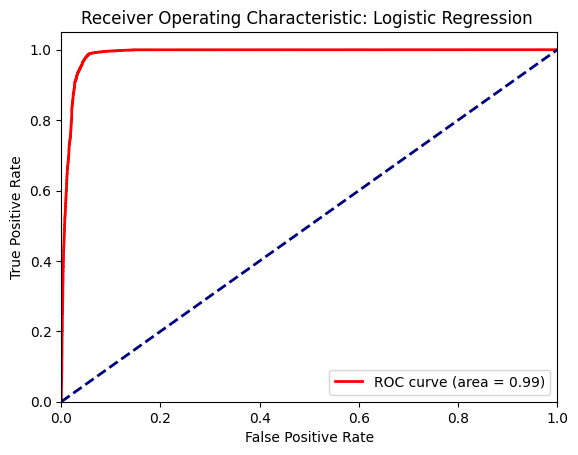

In [88]:
fpr, tpr, _ = metrics.roc_curve(y_val_hy, y_lr_val_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Logistic Regression ')
plt.legend(loc="lower right")
plt.show()

#### 8.2. Model 1.1 : Polynomial Logistic Regression



In [89]:
polynomial_logistic_model = make_pipeline(PolynomialFeatures(2), LogisticRegression())
polynomial_logistic_model.fit(x_train_hy,y_train_hy)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [90]:
#Validation Set
# Prediction probabilities on Validation Set
y_poly_val_pred_prob = polynomial_logistic_model.predict_proba(x_val_hy)[:, 1]


# Performance Metric: AUC-ROC score
auc_score_val_set = roc_auc_score(y_val_hy, y_poly_val_pred_prob)
print(f'AUC-ROC: Validation Set: {auc_score_val_set}')

AUC-ROC: Validation Set: 0.9888720333561322


In [91]:
y_test_pred_prob = polynomial_logistic_model.predict_proba(x_test_pca)[:, 1]
predictions_poly = pd.DataFrame({'player_id': test_df['player_id'],'drafted': y_test_pred_prob})
predictions_poly.to_csv('predictions_poly.csv', index=False)
print("Success")

Success


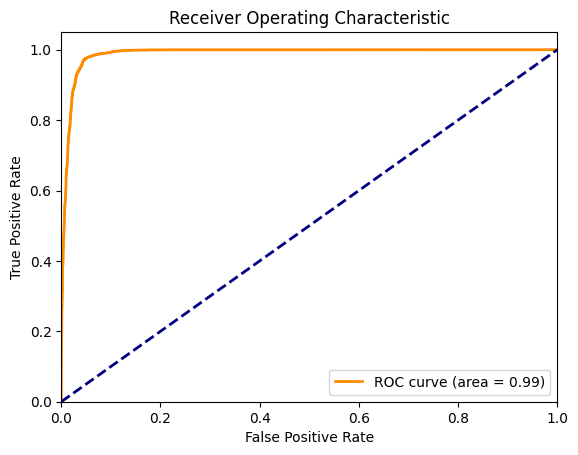

In [92]:
fpr, tpr, _ = metrics.roc_curve(y_val_hy, y_poly_val_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()